<a href="https://colab.research.google.com/github/divyansh351/ML-Bootcamp-WOC/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KNN**


### **Importing Necessary libraries and dataset**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/cyberlabs/emnist_data2
train_path = '/content/drive/MyDrive/cyberlabs/emnist_data2/emnist-letters-train.csv'
test_path = '/content/drive/MyDrive/cyberlabs/emnist_data2/emnist-letters-test.csv'
data_train = pd.read_csv(train_path, header=None)
data_test = pd.read_csv(test_path, header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/cyberlabs/emnist_data2


### **Pre-Processing the test and train dataset**

In [ ]:
data_test=np.array(data_test)
m, n = data_test.shape
data_test = data_test[0:m].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_testi = X_test 
X_test=X_testi.T

data_train=np.array(data_train)
p,q=data_train.shape
data_train = data_train[0:p].T
Y_train = data_train[0]  
X_traini = data_train[1:q]
X_traini = X_traini     
X_train=X_traini.T
a,b=X_train.shape

### **Running the KNN algorithm**

In [ ]:
def euclidean_dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
def KNN(X,Y,x,k=10):
    m=X.shape[0]
    val=[]
    for i in range(m):
        x_i=X[i]
        dist=euclidean_dist(x,x_i)
        val.append((dist,Y[i]))
    val=sorted(val,key = lambda x:x[0])[:k]
    val=np.asarray(val)
    new_vals=np.unique(val[:,1],return_counts=True)
    index=new_vals[1].argmax()
    output=new_vals[0][index]
    return output
def plotimg(n):
    print(KNN(X_train,Y_train,X_test[n]))
    print("label :",Y_test[n])
   

In [ ]:
def Y_pred(X,Y,x):
    Y_out=[]
    for i in range(n):
            Y_pred=KNN(X,Y,x[i])
            Y_out.append(Y_pred)
    return Y_out
Y_pre=Y_pred(X_train,Y_train,X_test)
def accuracy(Y):
    predictions=Y_pre
    count=0
    for i in range(n): 
        if(predictions[i]==Y[i]):
            count+=1
    return count/n
Y_pred(X_train, Y_train, X_test)
accuracy(Y_test)

0.8598726114649682

In [ ]:
plotimg(13000)

17.0
label : 17


### **Visualizing data**

In [ ]:
def displayData(X):     
  print(X.shape)
  m, n = X.shape
  nbImagesPerRow = int(np.sqrt(m))
  columnsCount = (28 + 2) * nbImagesPerRow
  result = np.empty((0, columnsCount))
  row = 0
  while row < m:
    new_row = np.empty((28, 0))
    for col in range(nbImagesPerRow):
      new_row = np.c_[new_row, X[row].reshape(28, 28).T]
      new_row = np.c_[new_row, np.zeros((28,2))]
      row = row + 1  
    result = np.r_[result, new_row]
    result = np.r_[result, np.zeros((1, columnsCount))]
    
  plt.imshow(result, cmap='gray', interpolation='nearest') 

Visualizing Data ...
(25, 784)


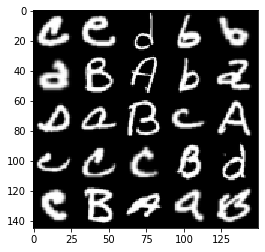

In [ ]:
print('Visualizing Data ...')
rand_indices = np.random.choice(m, 25)
displayData(X_train[rand_indices])
plt.show(block=False)